<a href="https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/statistics/Statistical_Thinking_Data_Analysis_and_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
loan_full_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/loan_analysis.csv')

In [0]:
loan_full_df.shape[0]

1048563

In [0]:
loan_full_df.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,title,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint
0,68407277,3600,13.99,123.03,C,leadman,MORTGAGE,55000.0,Fully Paid,debt_consolidation,Debt consolidation,5.91,0,675,679,1,30.0,2765,0.00,564,560,Individual,NaN,NaN
1,68355089,24700,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Fully Paid,small_business,Business,16.06,1,715,719,4,6.0,21470,0.00,699,695,Individual,NaN,NaN
2,68341763,20000,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Fully Paid,home_improvement,NaN,10.78,0,695,699,0,NaN,7869,0.00,704,700,Joint App,71000.0,13.85
3,66310712,35000,14.85,829.90,C,Information Systems Officer,MORTGAGE,110000.0,Current,debt_consolidation,Debt consolidation,17.06,0,785,789,0,NaN,7802,15897.65,679,675,Individual,NaN,NaN
4,68476807,10400,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Fully Paid,major_purchase,Major purchase,25.37,1,695,699,3,12.0,21929,0.00,704,700,Individual,NaN,NaN


In [0]:
loan_full_df['loan_status'].value_counts()

Fully Paid            482595
Current               419550
Charged Off           129187
Late (31-120 days)     10879
In Grace Period         4227
Late (16-30 days)       2104
Default                   21
Name: loan_status, dtype: int64

In [0]:
loan_int_df=loan_full_df[loan_full_df['loan_status']!='Current']
loan_int_df=loan_int_df[loan_full_df['loan_status']!='Late (31-120 days)']
loan_int_df=loan_int_df[loan_full_df['loan_status']!='In Grace Period']
loan_int_df=loan_int_df[loan_full_df['loan_status']!='Late (16-30 days)']
loan_int_df['loan_status']=loan_int_df['loan_status'].replace('Charged Off','Default')
loan_int_df['loan_status']=loan_int_df['loan_status'].replace('Fully Paid','Good')

In [0]:
loan_int_df['loan_status'].value_counts()

Good       482595
Default    129208
Name: loan_status, dtype: int64

In [0]:
loan_int_df['last_fico_range_low'].min()

0

In [0]:
loan_int_df['last_fico_range_low']=loan_int_df.apply(lambda x: x['fico_range_low'] if x['last_fico_range_low']==0 else x['last_fico_range_low'],axis=1)

In [0]:
loan_int_df['last_fico_range_low'].value_counts().sort_index()

500    3585
505    3895
510    4328
515    4564
520    5228
       ... 
825    1497
830     887
835     448
840     246
845     124
Name: last_fico_range_low, Length: 70, dtype: int64

In [0]:
pd.cut(loan_int_df['last_fico_range_low'],5)

0          (499.655, 569.0]
1            (638.0, 707.0]
2            (638.0, 707.0]
4            (638.0, 707.0]
5            (707.0, 776.0]
                 ...       
1048558      (569.0, 638.0]
1048559      (638.0, 707.0]
1048560      (638.0, 707.0]
1048561      (707.0, 776.0]
1048562      (707.0, 776.0]
Name: last_fico_range_low, Length: 611803, dtype: category
Categories (5, interval[float64]): [(499.655, 569.0] < (569.0, 638.0] < (638.0, 707.0] < (707.0, 776.0] <
                                    (776.0, 845.0]]

In [0]:
loan_int_df['fico_buckets']=pd.cut(loan_int_df['last_fico_range_low'],5,labels=['High Risky','Risky','Low Risk','Good','Excellent'])

In [0]:
loan_int_df['fico_buckets'].value_counts()

Low Risk      222683
Good          186904
Risky          79704
High Risky     76403
Excellent      46109
Name: fico_buckets, dtype: int64

In [0]:
loan_status_df=loan_int_df[['loan_status','fico_buckets']].groupby(['loan_status','fico_buckets']).agg({'fico_buckets':'count'})

In [0]:
loan_status_df.rename({'fico_buckets':'count'},axis='columns').reset_index()

,loan_status,fico_buckets,count
0,Default,High Risky,62487
1,Default,Risky,40171
2,Default,Low Risk,22693
3,Default,Good,3530
4,Default,Excellent,327
5,Good,High Risky,13916
6,Good,Risky,39533
7,Good,Low Risk,199990
8,Good,Good,183374
9,Good,Excellent,45782


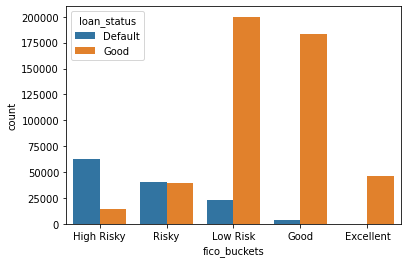

In [0]:
sns.barplot(x="fico_buckets", y="count", hue="loan_status", data=loan_status_df.rename({'fico_buckets':'count'},axis='columns').reset_index())

In [0]:
pd.qcut(loan_int_df['int_rate'],5)

0                     (13.33, 16.55]
1                     (10.99, 13.33]
2                      (8.18, 10.99]
4                     (16.55, 30.99]
5                     (13.33, 16.55]
                     ...            
1048558               (13.33, 16.55]
1048559               (10.99, 13.33]
1048560                (8.18, 10.99]
1048561    (5.308999999999999, 8.18]
1048562    (5.308999999999999, 8.18]
Name: int_rate, Length: 611803, dtype: category
Categories (5, interval[float64]): [(5.308999999999999, 8.18] < (8.18, 10.99] < (10.99, 13.33] < (13.33, 16.55] <
                                    (16.55, 30.99]]

In [0]:
loan_int_df['rate_buckets']=pd.qcut(loan_int_df['int_rate'],5,labels=['Low','Medium','High','Very High','ForgetIt'])

In [0]:
loan_int_df['rate_buckets'].value_counts()

Low          130377
High         127875
Very High    118875
Medium       117920
ForgetIt     116756
Name: rate_buckets, dtype: int64

In [0]:
loan_rate_df=loan_int_df[['loan_status','rate_buckets']].groupby(['loan_status','rate_buckets']).agg({'rate_buckets':'count'})

In [0]:
loan_rate_df.rename({'rate_buckets':'count'},axis='columns').reset_index()

,loan_status,rate_buckets,count
0,Default,Low,8572
1,Default,Medium,16128
2,Default,High,25441
3,Default,Very High,32580
4,Default,ForgetIt,46487
5,Good,Low,121805
6,Good,Medium,101792
7,Good,High,102434
8,Good,Very High,86295
9,Good,ForgetIt,70269


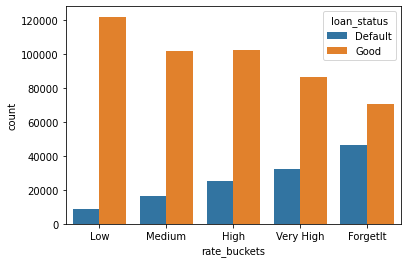

In [0]:
sns.barplot(x="rate_buckets", y="count", hue="loan_status", data=loan_rate_df.rename({'rate_buckets':'count'},axis='columns').reset_index())

In [0]:
loan_int_df[['loan_status','rate_buckets','fico_buckets']].groupby(['fico_buckets','rate_buckets']).agg({'loan_status':'count'})

loan_status
fico_buckets rate_buckets             
High Risky   Low                  4821
             Medium               9643
             High                16080
             Very High           19819
             ForgetIt            26040
Risky        Low                  7162
             Medium              11806
             High                18385
             Very High           19204
             ForgetIt            23147
Low Risk     Low                 33000
             Medium              44070
             High                51648
             Very High           48148
             ForgetIt            45817
Good         Low                 59777
             Medium              43395
             High                36022
             Very High           28051
             ForgetIt            19659
Excellent    Low                 25617
             Medium               9006
             High                 5740
             Very High            3653
             ForgetIt             2093

In [0]:
pd.crosstab(index=loan_int_df['fico_buckets'],columns=loan_int_df['rate_buckets'], margins=True)

rate_buckets,Low,Medium,High,Very High,ForgetIt,All
fico_buckets,,,,,,
High Risky,4821,9643,16080,19819,26040,76403
Risky,7162,11806,18385,19204,23147,79704
Low Risk,33000,44070,51648,48148,45817,222683
Good,59777,43395,36022,28051,19659,186904
Excellent,25617,9006,5740,3653,2093,46109
All,130377,117920,127875,118875,116756,611803


In [0]:
pd.crosstab(index=loan_int_df['fico_buckets'],columns=loan_int_df['rate_buckets']).apply(lambda x: x/x.sum(), axis=1)

rate_buckets,Low,Medium,High,Very High,ForgetIt
fico_buckets,,,,,
High Risky,0.063100,0.126212,0.210463,0.259401,0.340824
Risky,0.089857,0.148123,0.230666,0.240941,0.290412
Low Risk,0.148193,0.197905,0.231935,0.216218,0.205750
Good,0.319827,0.232178,0.192730,0.150082,0.105182
Excellent,0.555575,0.195320,0.124488,0.079225,0.045392


In [0]:
fico_rate_ct=pd.crosstab(index=loan_int_df['fico_buckets'],columns=loan_int_df['rate_buckets'])

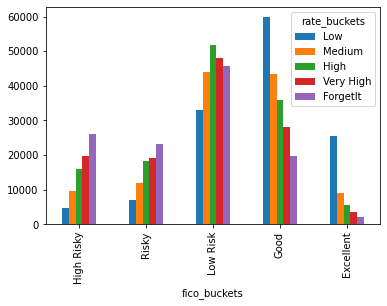

In [0]:
fico_rate_ct.plot.bar()

In [0]:
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([fico_rate_ct.iloc[0].values,fico_rate_ct.iloc[1].values, fico_rate_ct.iloc[2].values, fico_rate_ct.iloc[3].values, fico_rate_ct.iloc[4].values])

In [0]:
print ("chi2     : " ,chi2)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2     :  94025.13343840712
p-value  :  0.0
Degree for Freedom :  16


In [0]:
import math
loan_int_df['fico_score']=loan_int_df['last_fico_range_low'].apply(lambda x: int(math.ceil(x/10))*10)

In [0]:
loan_int_df.head()

,id,loan_amnt,int_rate,installment,grade,emp_title,home_ownership,annual_inc,loan_status,purpose,title,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,revol_bal,out_prncp,last_fico_range_high,last_fico_range_low,application_type,annual_inc_joint,dti_joint,fico_buckets,rate_buckets,fico_score
0,68407277,3600,13.99,123.03,C,leadman,MORTGAGE,55000.0,Good,debt_consolidation,Debt consolidation,5.91,0,675,679,1,30.0,2765,0.0,564,560,Individual,NaN,NaN,High Risky,Very High,560
1,68355089,24700,11.99,820.28,C,Engineer,MORTGAGE,65000.0,Good,small_business,Business,16.06,1,715,719,4,6.0,21470,0.0,699,695,Individual,NaN,NaN,Low Risk,High,700
2,68341763,20000,10.78,432.66,B,truck driver,MORTGAGE,63000.0,Good,home_improvement,NaN,10.78,0,695,699,0,NaN,7869,0.0,704,700,Joint App,71000.0,13.85,Low Risk,Medium,700
4,68476807,10400,22.45,289.91,F,Contract Specialist,MORTGAGE,104433.0,Good,major_purchase,Major purchase,25.37,1,695,699,3,12.0,21929,0.0,704,700,Individual,NaN,NaN,Low Risk,ForgetIt,700
5,68426831,11950,13.44,405.18,C,Veterinary Tecnician,RENT,34000.0,Good,debt_consolidation,Debt consolidation,10.20,0,690,694,0,NaN,8822,0.0,759,755,Individual,NaN,NaN,Good,Very High,760


In [0]:
loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts().sort_index()

500     3183
510     7191
520     8370
530     9254
540    10127
550    10164
560     9703
570     9060
580     8004
590     6852
600     5881
610     5195
620     4468
630     3708
640     2898
650     2310
660     4091
670     5232
680     3918
690     2875
700     2027
710     1515
720     1024
730      613
740      447
750      298
760      230
770      167
780      136
790       92
800       72
810       52
820       28
830       14
840        6
850        3
Name: fico_score, dtype: int64

In [0]:
default_df=pd.DataFrame(loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts())

In [0]:
default_df=default_df.reset_index()

In [0]:
default_df.columns = ['fico_score','default_total']

In [0]:
default_df

,fico_score,default_total
0,550,10164
1,540,10127
2,560,9703
3,530,9254
4,570,9060
5,520,8370
6,580,8004
7,510,7191
8,590,6852
9,600,5881


In [0]:
default_df[['fico_score','default_total']].corr()

,fico_score,default_total
fico_score,1.000000,-0.886782
default_total,-0.886782,1.000000


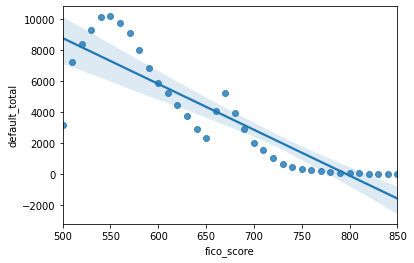

In [0]:
sns.regplot(x='fico_score',y='default_total',data=default_df) 

In [0]:
default_df[['fico_score','default_total']].corr('spearman')

,fico_score,default_total
fico_score,1.000000,-0.939511
default_total,-0.939511,1.000000


In [0]:
!pip install pwlf
import pwlf

In [0]:
pwlf = pwlf.PiecewiseLinFit(default_df['fico_score'], default_df['default_total'])

In [0]:
pwise_model = pwlf.fit(4)

In [0]:
pwlf.fit_breaks

array([500.        , 536.39270227, 619.99999988, 759.19227488,
       850.        ])

In [0]:
pwlf.slopes

array([193.92070356, -78.48208575, -31.58319951,  -2.40924884])

In [0]:
pwlf.intercepts

array([-92869.65822243,  53245.21004417,  24167.90057896,   2019.26260598])

In [0]:
yHat_piecewise = pwlf.predict(default_df['fico_score'])

In [0]:
plt.figure()
plt.plot(['fico_score'], default_df['default_total'], 'o')
plt.plot(default_df['fico_score'], yHat_piecewise, '-')
plt.show()

In [0]:
loan_sample=loan_int_df.sample(10000)

In [0]:
loan_sample.shape

In [0]:
loan_sample['loan_status'].value_counts()

In [0]:
loan_sample.head()

In [0]:
loan_status_df=loan_int_df[['loan_status','fico_buckets']].groupby(['loan_status','fico_buckets']).agg({'fico_buckets':'count'})

In [0]:
sns.barplot(x="fico_buckets", y="count", hue="loan_status", data=loan_status_df.rename({'fico_buckets':'count'},axis='columns').reset_index())

In [0]:
sns.regplot(x='fico_score',y='default_total',data=loan_df) 